In [59]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Examples for some scipy functions

In [10]:
X = np.array([[1,2,3] , [4,5,6], [9,8,6] ,[2,6,1]])

In [11]:
X

array([[1, 2, 3],
       [4, 5, 6],
       [9, 8, 6],
       [2, 6, 1]])

In [12]:
equi_dist = pdist(X, 'sqeuclidean') #calculates the sum of square distances for each sample , example:
                                    #(sqrt(1-2)+sqrt(2-4)+sqrt(3-6)) 
                                    #for X[0] and X[1]

In [13]:
equi_dist

array([ 27., 109.,  21.,  34.,  30.,  78.])

In [16]:
A = squareform(equi_dist)
A

array([[  0.,  27., 109.,  21.],
       [ 27.,   0.,  34.,  30.],
       [109.,  34.,   0.,  78.],
       [ 21.,  30.,  78.,   0.]])

In [21]:
print(A[0,1],A[0,2],A[0,3],A[1,2],A[1,3],A[2,3]) #square because of accessing the distance between the vectors

27.0 109.0 21.0 34.0 30.0 78.0


# RBF Kernal 

In [23]:
from sklearn.datasets import make_moons
X_,Y_= make_moons(n_samples=100,random_state=47)

In [25]:
X_[:10]

array([[ 0.46253829,  0.88659931],
       [ 1.8380881 , -0.0455349 ],
       [ 1.94905575,  0.18489178],
       [ 1.67230089, -0.240278  ],
       [ 0.32769911, -0.240278  ],
       [ 0.94905575,  0.31510822],
       [-0.76144596,  0.6482284 ],
       [ 0.6234898 ,  0.78183148],
       [-0.8380881 ,  0.5455349 ],
       [-0.99179001,  0.12787716]])

In [27]:
Y_

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

Text(0.5, 1.0, 'normal moons data')

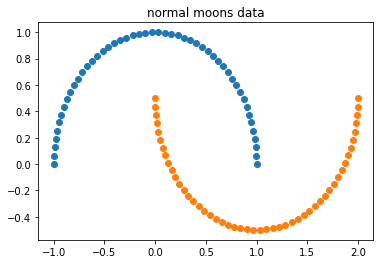

In [124]:
plt.scatter(X_[Y_==0,0],X_[Y_==0,1])
plt.scatter(X_[Y_==1,0],X_[Y_==1,1])
plt.title("normal moons data")

In [49]:
#step 1 - finding the distances
sq_dist = pdist(X_,metric = 'sqeuclidean')

In [53]:
#step2 - calculating the square form
K = squareform(sq_dist)
K.shape

(100, 100)

In [114]:
gamma = 15
RBF_mat = np.exp(-gamma*K) 

In [115]:
#exp matrix 
pd.DataFrame(RBF_mat)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000e+00,1.031856e-18,2.495821e-18,1.561835e-18,4.066387e-09,2.140032e-04,7.419147e-11,5.750920e-01,1.668144e-12,2.961157e-18,...,1.775111e-18,5.636929e-07,1.116376e-01,3.053025e-17,1.974927e-03,5.961850e-14,7.770997e-03,1.895429e-13,7.796845e-04,2.586134e-03
1,1.031856e-18,1.000000e+00,3.748782e-01,3.748782e-01,7.794081e-16,1.008920e-06,6.964401e-48,8.516571e-15,1.170499e-49,4.317952e-53,...,5.750920e-01,4.980929e-19,1.484988e-27,2.586134e-03,3.385947e-24,1.758007e-08,1.091480e-08,2.957125e-09,2.741441e-07,6.050617e-08
2,2.495821e-18,3.748782e-01,1.000000e+00,2.105876e-02,4.980929e-19,2.372041e-07,5.511021e-50,1.706185e-14,3.528632e-52,4.349163e-57,...,9.402230e-01,7.044013e-22,2.249027e-27,1.243114e-05,7.843692e-26,1.123482e-11,6.669653e-09,1.668144e-12,9.074953e-08,2.755046e-08
3,1.561835e-18,3.748782e-01,2.105876e-02,1.000000e+00,1.668144e-12,3.828411e-06,1.868683e-44,1.067697e-14,8.377856e-46,7.616416e-48,...,5.125542e-02,7.794081e-16,7.369070e-27,1.116376e-01,7.044013e-22,1.243114e-05,2.185351e-08,2.661821e-06,8.171875e-07,1.457013e-07
4,4.066387e-09,7.794081e-16,4.980929e-19,1.668144e-12,1.000000e+00,2.988754e-05,1.347697e-13,4.210923e-08,1.330002e-13,5.958148e-13,...,2.961157e-18,3.748782e-01,5.056131e-11,9.942609e-08,2.140032e-04,7.770997e-03,3.924972e-06,2.105876e-02,1.558251e-05,7.913155e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.961850e-14,1.758007e-08,1.123482e-11,1.243114e-05,7.770997e-03,5.369829e-05,7.699891e-26,1.594826e-11,5.001891e-26,4.647620e-25,...,7.419147e-11,5.376041e-05,1.179713e-18,2.105876e-02,7.419147e-11,1.000000e+00,5.809239e-07,9.402230e-01,1.275553e-05,2.815265e-06
96,7.770997e-03,1.091480e-08,6.669653e-09,2.185351e-08,3.924972e-06,5.750920e-01,2.961157e-18,1.116376e-01,8.807055e-20,3.385947e-24,...,7.387480e-09,7.050791e-06,2.661821e-06,8.158685e-08,1.142934e-05,5.809239e-07,1.000000e+00,7.381228e-07,7.816880e-01,9.402230e-01
97,1.895429e-13,2.957125e-09,1.668144e-12,2.661821e-06,2.105876e-02,5.523384e-05,2.260277e-24,3.600537e-11,1.633978e-24,1.740464e-23,...,1.123482e-11,2.140032e-04,7.797128e-18,7.770997e-03,4.766816e-10,9.402230e-01,7.381228e-07,1.000000e+00,1.398612e-05,3.312441e-06
98,7.796845e-04,2.741441e-07,9.074953e-08,8.171875e-07,1.558251e-05,9.402230e-01,8.807055e-20,2.105876e-02,3.289670e-21,4.158133e-25,...,1.193137e-07,1.081474e-05,9.942609e-08,3.513265e-06,2.533904e-06,1.275553e-05,7.816880e-01,1.398612e-05,1.000000e+00,9.402230e-01


In [116]:
#before finding the eigon decomposition centering the data using the following formula : K′=K−1N.K−K.1N+1N.K.1N
#1N = 1/N = in our case N = 100
N = 100 
N_1 = np.ones((N,N))/N
Final_mat = RBF_mat - N_1.dot(RBF_mat) - RBF_mat.dot(N_1) + N_1.dot(RBF_mat).dot(N_1)

In [117]:
#finding the eigenvalues and eigenvectors
eig_val,eig_vec =  np.linalg.eigh(Final_mat)

In [111]:
Y_.shape

(100,)

In [125]:
output = eig_vec[:,-2:]

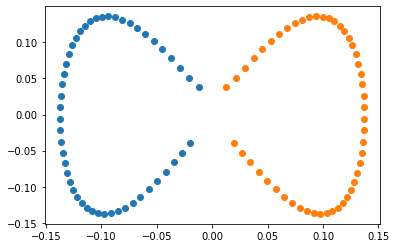

In [129]:
plt.scatter(output[Y_==0,1],output[Y_==0,0])
plt.scatter(output[Y_==1,1],output[Y_==1,0])  #our RBF

# sklearn's RBF kernal PCA

In [121]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
Xkpca = kpca.fit_transform(X_)

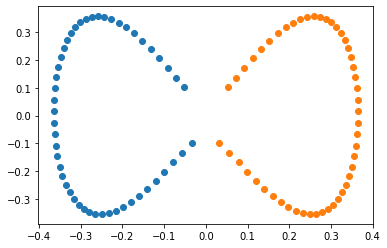

In [122]:
plt.scatter(Xkpca[Y_==0,0],Xkpca[Y_==0,1])
plt.scatter(Xkpca[Y_==1,0],Xkpca[Y_==1,1])